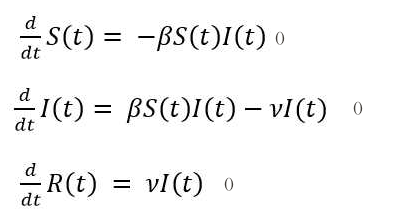

# SIR Determinístico

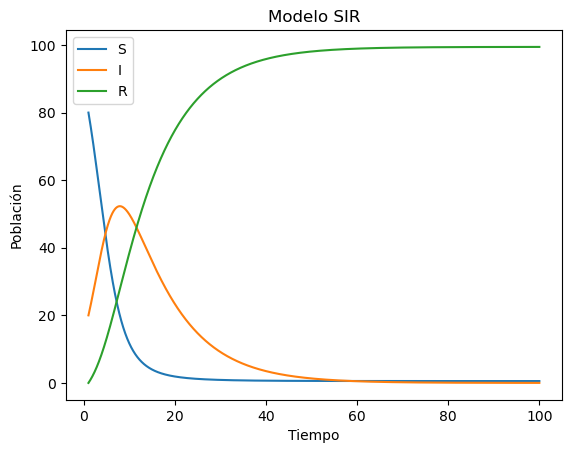

In [82]:
import matplotlib.pyplot as plt
import numpy as np

beta=0.5
gamma=0.05
t=np.linspace(1,100,10000)

SIR=np.zeros((len(t),3))
SIR[(0,0)]=990
SIR[(0,1)]=10
SIR[(0,2)]=0
dt=t[1]-t[0]
N=SIR[(0,0)]+SIR[(0,1)]+SIR[(0,2)]

for i in range (len(t)-1):
    DS=(-beta*SIR[(i,0)]*SIR[(i,1)])/N
    DI=(beta*SIR[(i,0)]*SIR[(i,1)])/N-gamma*SIR[(i,1)]
    DR=gamma*SIR[(i,1)]
    
    SIR[(i+1,0)]=SIR[(i,0)]+DS*dt
    SIR[(i+1,1)]=SIR[(i,1)]+DI*dt
    SIR[(i+1,2)]=SIR[(i,2)]+DR*dt

plt.plot(t,SIR[:,0], label='S')
plt.plot(t,SIR[:,1],label='I')
plt.plot(t,SIR[:,2],label='R')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Modelo SIR')
plt.legend()

# SIR Estocástico Binomial

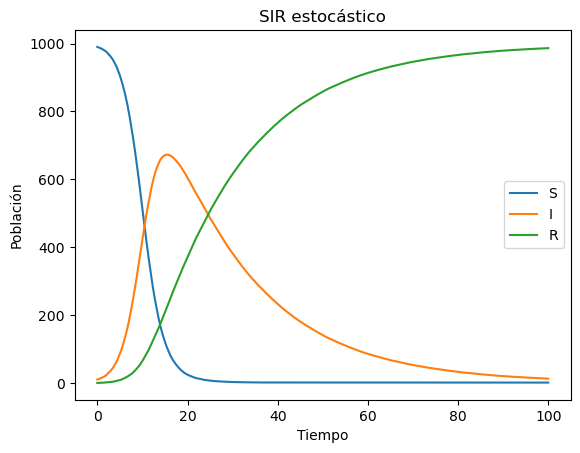

In [110]:
def SIR_estocastico(tiempo,S0,I0,R0,beta,gamma,dt):
    N=S0+I0+R0
    t=np.arange(0,tiempo,dt)
    S=np.zeros(len(t))
    I=np.zeros(len(t))         
    R=np.zeros(len(t))
    S[0]=S0
    I[0]=I0
    R[0]=R0

    for i in range(len(t)-1):
        E_S=np.random.binomial(S[i],(beta*I[i])/N)
        E_I=np.random.binomial(I[i],gamma)
        
        S[i+1]=S[i]-E_S*dt
        I[i+1]=I[i]+E_S*dt-E_I*dt
        R[i+1]=R[i]+E_I*dt
    plt.plot(t,S,label='S')
    plt.plot(t,I,label='I')
    plt.plot(t,R,label='R')
    plt.title("SIR estocástico")
    plt.xlabel("Tiempo")
    plt.ylabel("Población")
    plt.legend()


t=100
dt=0.01
S0=990
I0=10
R0=0
beta=0.5
gamma=0.05
SIR=SIR_estocastico(t,S0,I0,R0,beta,gamma,dt)    
    

# SIR Estocástico Doob-g-Gillispie

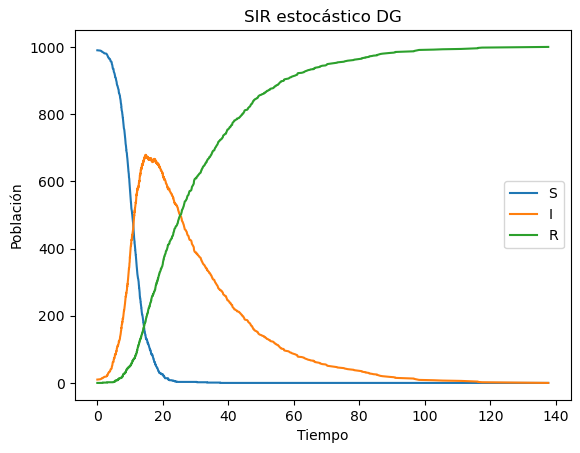

In [123]:
def SIR_DOOB(S0, I0, R0, beta, gamma,tf,t0):
    S,I,R,t=[],[],[],[]
    
    S.append(S0)
    I.append(I0)
    R.append(R0)
    t.append(t0)
    N=S0+I0+R0
    
    i=0
    
    while (t[i]<=tf) and (I[i]!=0):
        
        ES=beta*S[i]*I[i]/N
        EI=gamma*I[i]
        
        dt=np.random.exponential(1/(ES+EI))
        r=np.random.choice([0,1],p=[ES/(ES+EI),EI/(ES+EI)])
        t.append(t[i]+dt)
        
        if r==0:
            S.append(S[i]-1)
            I.append(I[i]+1)
            R.append(R[i])

        else:
            S.append(S[i])
            I.append(I[i]-1)
            R.append(R[i]+1)
        i+=1
    return np.array((t)),np.array((S)),np.array((I)),np.array((R))
                                 
        
                                    
S0=990
I0=10
R0=0
beta=0.5
gamma=0.05
t0=0
tf=200
t, S, I, R=SIR_DOOB(S0, I0, R0, beta, gamma,tf,t0)
plt.plot(t,S,label='S')
plt.plot(t,I,label='I')
plt.plot(t,R,label='R')
plt.title("SIR estocástico DG")
plt.xlabel("Tiempo")
plt.ylabel("Población")
plt.legend()